In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import numpy as np
import pandas as pd

df = pd.read_csv('ECal_PMT_map_row_col.csv',dtype=str)
df32 = pd.read_csv('ECalSums32.csv', dtype=str)


In [8]:
df = df.reset_index()  # make sure indexes pair with number of rows

sums32col = []
for index, row in df.iterrows():
    #print("\n")
    #print(row['Sum_of_8_ID'])
    sums32 = []
    for idx32, row32 in df32.iterrows():
        llr = str(row32['lrow'])
        llc = str(row32['lcol'])
        urr = str(row32['hrow'])
        urc = str(row32['hcol'])
        if str(row['S8row']) >= llr and str(row['S8row']) <= urr and str(row['S8col']) >= llc and str(row['S8col']) <= urc: 
            sums32.append(row["Sum_of_8_ID"])
            #print(llr,llc,' ', row['S8row'],row['S8col'],' ', urr,urc)
    sums32col.append(sums32)

#print(df)

1692


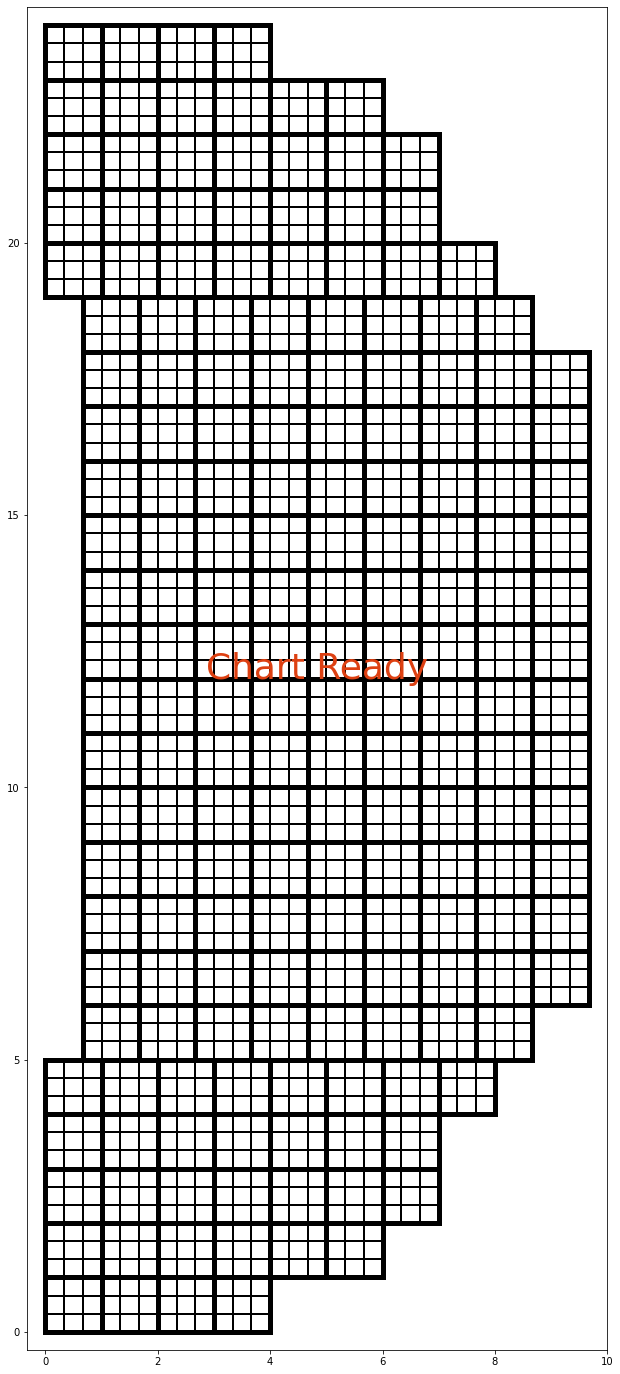

In [14]:
ncol = (4,6,7,7,8,8,9,9,9,9,9,9,9,9,9,9,9,9,8,8,7,7,6,4)
offset = (0,0,0,0,0,0.667,0.667,0.667,0.667,0.667,0.667,0.667,0.667,0.667,0.667,0.667,0.667,0.667,0.667,0,0,0,0,0)
width = 1
height = 1
xPMT=[]
yPMT=[]
#define Matplotlib figure and axis
fig, ax = plt.subplots(1,1, figsize=(10.4,24.7))

#plt.rcParams["figure.figsize"]=(24,11)

#add rectangle to plot
row = 0
pmtsize = 0.333333333
for n in ncol:
    for i in range(n):
        x = i + offset[row]
        y = row
        ax.add_patch(Rectangle((x, y), 1, 1,edgecolor = 'black',facecolor = 'white',fill=True,lw=5))
        for j in range(3):
            for k in range(3):
                xPMT.append(x+pmtsize*j)
                yPMT.append(y+pmtsize*k)
                ax.add_patch(Rectangle((x+pmtsize*j, y+pmtsize*k), pmtsize, pmtsize,edgecolor = 'black',
                                            facecolor = 'white',fill=False,lw=2))
    row = row + 1
print(len(xPMT) )   
df["Sums_of_32"] = sums32col
df["xPMT"] = xPMT
df["yPMT"] = yPMT

plt.xlim(-0.33,10)
plt.ylim(-0.33,24.333)

annot_x = (plt.xlim()[1] + plt.xlim()[0])/2
annot_y = (plt.ylim()[1] + plt.ylim()[0])/2
txt = ax.text(annot_x, annot_y, "Chart Ready", 
              ha='center', fontsize=36, color='#DD4012')
def hover(event):
    txt.set_text("")
fig.canvas.mpl_connect("motion_notify_event", hover)

#display plot
plt.show()
